In [194]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from skfeature.function.statistical_based import CFS

In [195]:
data = pd.read_csv('diabetes.txt',encoding='cp1251', sep='\t')

In [196]:
data.head()

,Беременность,Глюкоза,АД,Толщина КС,Инсулин,ИМТ,Наследственность,Возраст,Диагноз
0,6,148,72,35.0,0.0,33.6,0.627,50,1
1,1,85,66,29.0,0.0,26.6,0.351,31,0
2,8,183,64,0.0,0.0,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1


In [197]:
data['Диагноз'].value_counts()

Диагноз
0    500
1    268
Name: count, dtype: int64

In [198]:
x = data.drop('Диагноз', axis=1)
y = data['Диагноз']

In [199]:
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

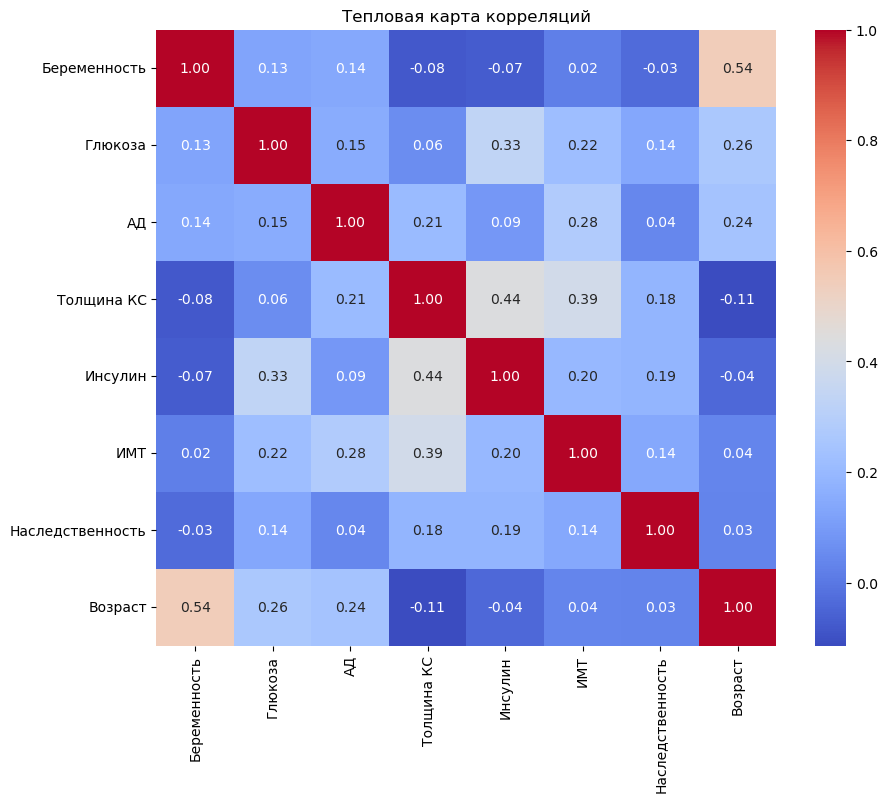

In [200]:
plt.figure(figsize=(10, 8))
sns.heatmap(x_scaled.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Тепловая карта корреляций")
plt.show()

In [201]:
correlations = x_scaled.corrwith(y).sort_values(ascending=False)
print("Корреляция признаков с целевой переменной:\n", correlations)

Корреляция признаков с целевой переменной:
 Глюкоза             0.466581
ИМТ                 0.292695
Возраст             0.238356
Беременность        0.221898
Наследственность    0.173844
Инсулин             0.130548
Толщина КС          0.074752
АД                  0.065068
dtype: float64


In [202]:
correlations = x_scaled.corrwith(y).sort_values()
least_correlated_features = correlations.index[:2]
selected_features_naive = x_scaled.columns.drop(least_correlated_features)

print("\nУдалены:\n", least_correlated_cfs)

x_cfs = x_scaled[selected_features_cfs]


Удалены:
 Index(['АД', 'Толщина КС'], dtype='object')


In [203]:
least_correlated_features = ['Инсулин', 'Глюкоза']
x_naive = x_scaled.drop(columns=least_correlated_features)
print("\nИсключенные наименее коррелированные признаки:\n", least_correlated_features)


Исключенные наименее коррелированные признаки:
 ['Инсулин', 'Глюкоза']


In [204]:
x_train_cfs, x_test_cfs, y_train, y_test = train_test_split(x_cfs, y, test_size=0.25, random_state=42, stratify=y)
x_train_naive, x_test_naive, _, _ = train_test_split(x_naive, y, test_size=0.25, random_state=42, stratify=y)

In [205]:
class LogisticRegression:
    def __init__(self, step_size=0.01, num_iter=1000):
        self.step_size = step_size
        self.num_iter = num_iter

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        self.w = np.zeros(X.shape[1])

        for _ in range(self.num_iter):
            y_pred = self.sigmoid(X @ self.w)
            gradient = X.T @ (y_pred - y) / X.shape[0]
            self.w -= self.step_size * gradient

    def predict_proba(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        return self.sigmoid(X @ self.w)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

In [206]:
model_cfs = LogisticRegression()
model_cfs.fit(x_train_cfs, y_train)
y_pred_cfs = model_cfs.predict(x_test_cfs)


In [207]:
model_naive = LogisticRegression()
model_naive.fit(x_train_naive, y_train)
y_pred_naive = model_naive.predict(x_test_naive)

In [208]:
accuracy_cfs = metrics.accuracy_score(y_test, y_pred_cfs)
accuracy_naive = metrics.accuracy_score(y_test, y_pred_naive)

In [209]:
print(metrics.classification_report(y_test, y_pred_cfs))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       125
           1       0.63      0.57      0.60        67

    accuracy                           0.73       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.73      0.73       192



In [210]:
print(metrics.classification_report(y_test, y_pred_naive))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77       125
           1       0.55      0.36      0.43        67

    accuracy                           0.67       192
   macro avg       0.63      0.60      0.60       192
weighted avg       0.65      0.67      0.65       192



In [218]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=42, stratify=y)

In [219]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.80       125
           1       0.62      0.52      0.57        67

    accuracy                           0.72       192
   macro avg       0.69      0.68      0.68       192
weighted avg       0.72      0.72      0.72       192

